# Import Libraries

In [ ]:
from cm_api import *
from cm_config import config
import datetime
from helper_funct import *
from helper_funct1 import *
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [107]:
rt = config['refresh_token']
api_token = get_api_token(rt)


# Read in Dataset from Blog 4
Consists of songs from Altnernative VIBES playlist on Spotify between July 10 - December 28

In [15]:
altvibes = pd.read_csv('data/altvibes_past(clean)V2.csv', index_col=0)

In [16]:
#filter dataset down to artists who have Twitter, Instagram, and Tiktok

TTI = altvibes.loc[(altvibes['Twitter'] == True) & (altvibes['Instagram'] == True) & (altvibes['Tiktok'] == True)]

In [38]:
TTI['added_at'] = pd.to_datetime(TTI['added_at']).dt.date
TTI['removed_at'] = pd.to_datetime(TTI['removed_at']).dt.date

<ipython-input-38-7801e1400a6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TTI['added_at'] = pd.to_datetime(TTI['added_at']).dt.date
<ipython-input-38-7801e1400a6d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TTI['removed_at'] = pd.to_datetime(TTI['removed_at']).dt.date


In [39]:
TTI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 6 to 98
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   isrc                               18 non-null     object 
 1   added_at                           18 non-null     object 
 2   removed_at                         18 non-null     object 
 3   days_on_playlist                   18 non-null     int64  
 4   title                              18 non-null     object 
 5   artist                             18 non-null     object 
 6   spotify_pop                        9 non-null      float64
 7   cm_track_id                        18 non-null     int64  
 8   cm_artist_id                       18 non-null     int64  
 9   track_genre                        13 non-null     object 
 10  release_date                       18 non-null     object 
 11  before_pl_spfollowers              18 non-null     float64
 

In [227]:
top75 = TTI.loc[TTI['Net Follower Gain/Loss(Spotify)'] >= TTI['Net Follower Gain/Loss(Spotify)'].quantile(.75)]
top50 = TTI.loc[TTI['Net Follower Gain/Loss(Spotify)'] > TTI['Net Follower Gain/Loss(Spotify)'].quantile(.5)]
bottom50 = TTI.loc[TTI['Net Follower Gain/Loss(Spotify)'] < TTI['Net Follower Gain/Loss(Spotify)'].quantile(.50)]

/home/bull/Documents/practice1/test/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


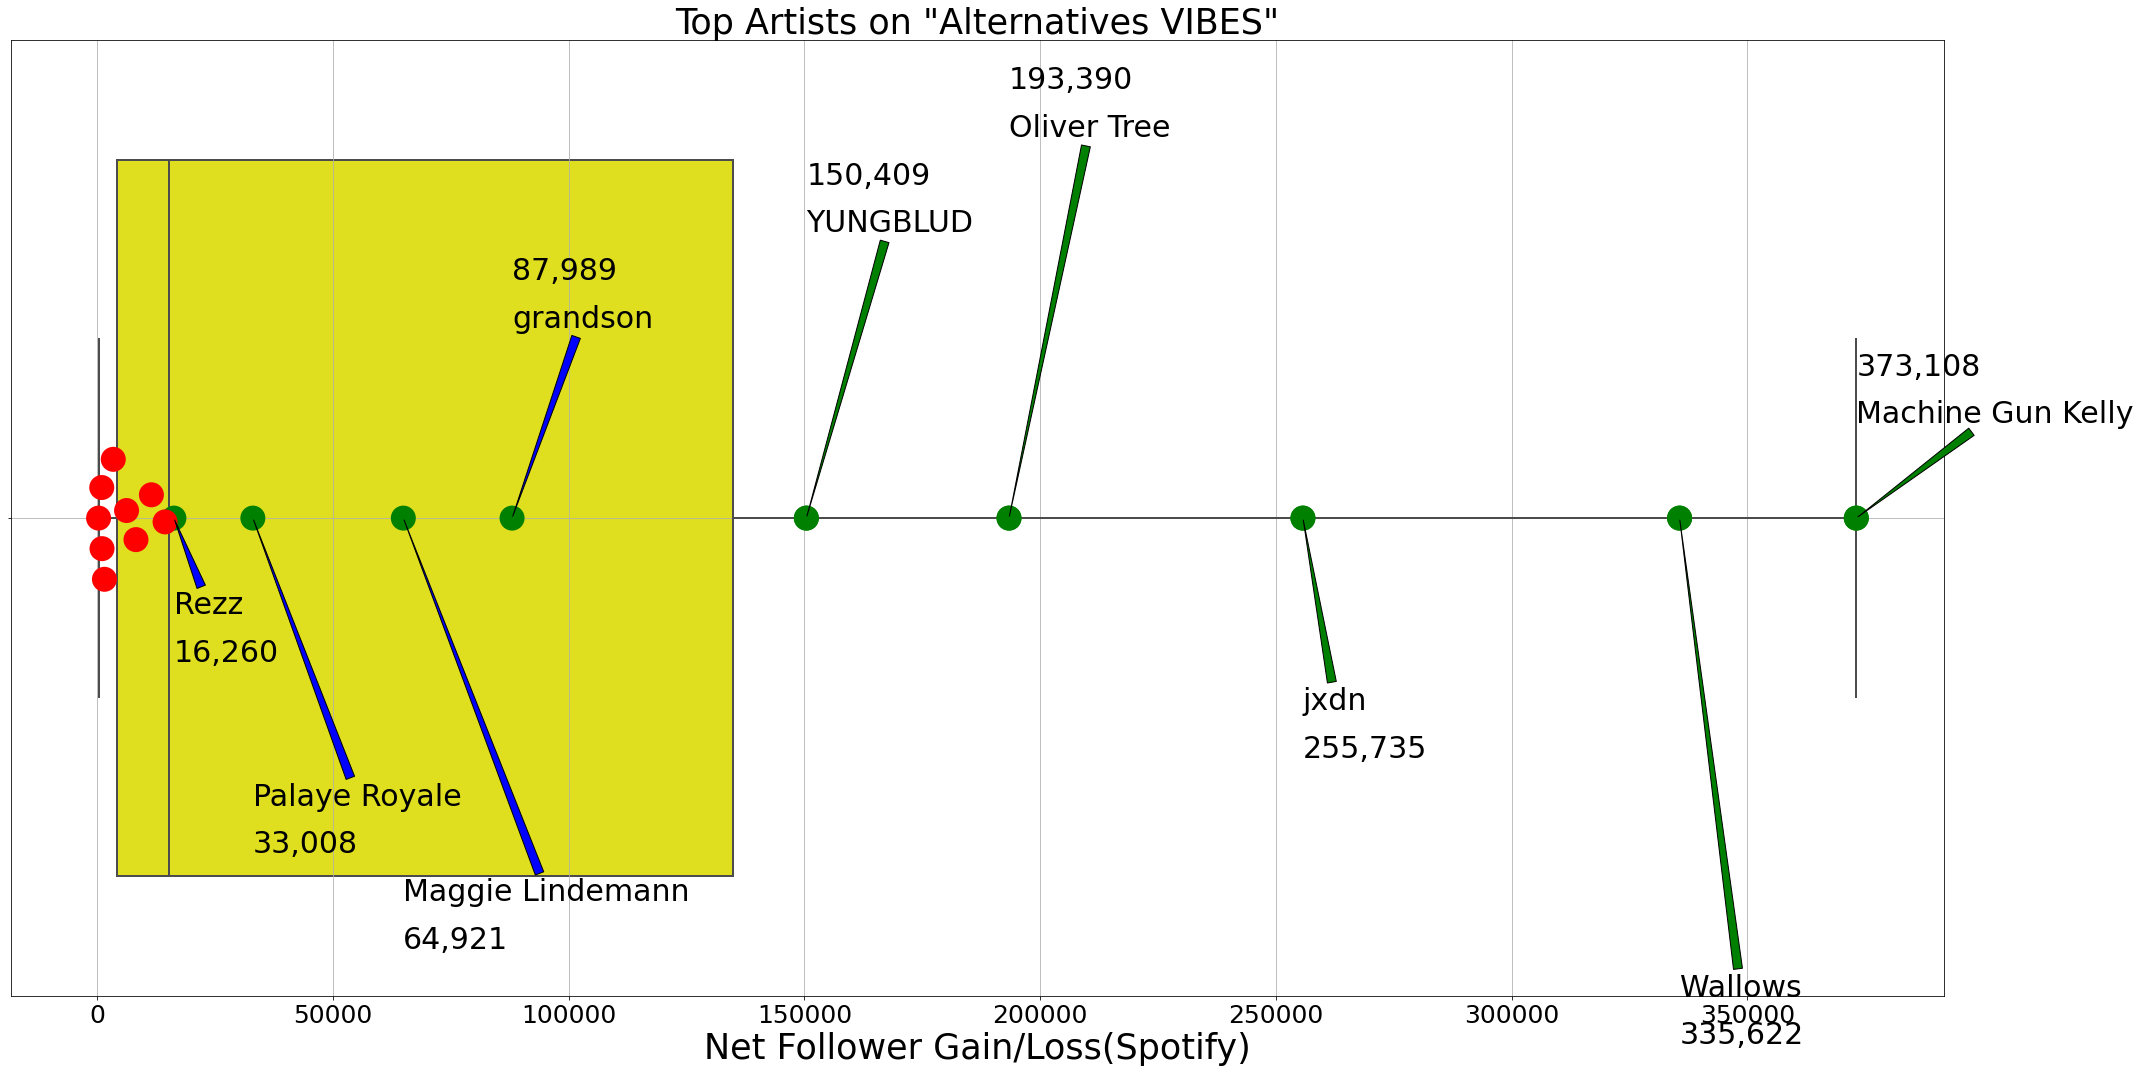

In [266]:
from matplotlib.pyplot import * 

fig = figure(figsize=(30,15))  # define the figure window
ax1  = fig.add_subplot(111)   # define the axis
sns.boxplot(TTI['Net Follower Gain/Loss(Spotify)'], fliersize=1,linewidth=2, whis=30,width=.75, color='yellow')
#markers with just twitter
sns.swarmplot(data=top75,x=top75['Net Follower Gain/Loss(Spotify)'], color='green', size=25)
sns.swarmplot(data=top50,x=top50['Net Follower Gain/Loss(Spotify)'], color='green', size=25)
sns.swarmplot(data=bottom50,x=bottom50['Net Follower Gain/Loss(Spotify)'], color='red', size=25)
# sns.swarmplot(data=popsongs,x=popsongs['Total Spotify Reach'], color='orange', size=25)




plt.title('Top Artists on "Alternatives VIBES"', fontsize=35)
plt.xlabel('Net Follower Gain/Loss(Spotify)', fontsize=35)
plt.ticklabel_format(style='plain', axis='x') #change xaxis from sci to plain style

num=0
ya=.1
yb=-.1
for track in TTI.iterrows():
    if track[1]['Net Follower Gain/Loss(Spotify)'] >= TTI['Net Follower Gain/Loss(Spotify)'].quantile(.75):
        if (num % 2) == 0:
            plt.annotate(track[1]['artist'], xy=(track[1]['Net Follower Gain/Loss(Spotify)'], 0),xytext=(track[1]['Net Follower Gain/Loss(Spotify)'], ya),
                     arrowprops=dict(facecolor='green', arrowstyle='wedge'), fontsize=30)
            plt.annotate(insert_thousands_commas(track[1]['Net Follower Gain/Loss(Spotify)']), xy=(track[1]['Net Follower Gain/Loss(Spotify)'], 0),xytext=(track[1]['Net Follower Gain/Loss(Spotify)'], ya+.05)
                     , fontsize=30)
            
            num+=1
            ya+=.1
        else:
            plt.annotate(track[1]['artist'], xy=(track[1]['Net Follower Gain/Loss(Spotify)'], 0),xytext=(track[1]['Net Follower Gain/Loss(Spotify)'], yb),
                     arrowprops=dict(facecolor='green', arrowstyle='wedge'), fontsize=30)
            plt.annotate(insert_thousands_commas(track[1]['Net Follower Gain/Loss(Spotify)']), xy=(track[1]['Net Follower Gain/Loss(Spotify)'], 0),xytext=(track[1]['Net Follower Gain/Loss(Spotify)'], yb-.05)
                     , fontsize=30)

            
            num+=1
            yb+=-.1
    elif track[1]['Net Follower Gain/Loss(Spotify)'] >= TTI['Net Follower Gain/Loss(Spotify)'].quantile(.5):
        if (num % 2) == 0:
            plt.annotate(track[1]['artist'], xy=(track[1]['Net Follower Gain/Loss(Spotify)'], 0),xytext=(track[1]['Net Follower Gain/Loss(Spotify)'], ya),
                     arrowprops=dict(facecolor='blue', arrowstyle='wedge'), fontsize=30)
            plt.annotate(insert_thousands_commas(track[1]['Net Follower Gain/Loss(Spotify)']), xy=(track[1]['Net Follower Gain/Loss(Spotify)'], 0),xytext=(track[1]['Net Follower Gain/Loss(Spotify)'], ya+.05)
                     , fontsize=30)
            
            num+=1
            ya+=.1
        else:
            plt.annotate(track[1]['artist'], xy=(track[1]['Net Follower Gain/Loss(Spotify)'], 0),xytext=(track[1]['Net Follower Gain/Loss(Spotify)'], yb),
                     arrowprops=dict(facecolor='blue', arrowstyle='wedge'), fontsize=30)
            plt.annotate(insert_thousands_commas(track[1]['Net Follower Gain/Loss(Spotify)']), xy=(track[1]['Net Follower Gain/Loss(Spotify)'], 0),xytext=(track[1]['Net Follower Gain/Loss(Spotify)'], yb-.05)
                     , fontsize=30)
            num+=1
            yb+=-.1


plt.tick_params(axis='x', which='major', labelsize=25)
plt.grid(axis='both')

plt.tight_layout()
plt.savefig('visuals/topartists_bp.png')

plt.show()

In [230]:
get_summary_statistics(TTI['Net Follower Gain/Loss(Spotify)'])

Min: 285
Mean: 86,552
Max: 373,108
25th percentile: 4,105
Median: 15,323
75th percentile: 134,804
Interquartile range (IQR): 130,699


## Tiktok Engagement Before Playlist
What is the tiktok engagement look like for each artist

In [42]:
tklikes_bucket = []
for row in TTI.iterrows():
    before_date = row[1]['added_at'] - datetime.timedelta(days=7)
    after_date = row[1]['removed_at'] + datetime.timedelta(days=7)

    artist_id = row[1]['cm_artist_id']
    data = get_fan_metrics(api_token, artist_id,'tiktok', before_date, after_date, field='likes')['likes']
    if len(data) > 0:
        tup = (data[0]['value'], data[-1]['value'])
        tklikes_bucket.append(tup)
    else:
        tup = (None, None)
        tklikes_bucket.append(tup) 
        
TTI['before_pl_tklikes'] = [x[0] for x in tklikes_bucket]
TTI['after_pl_tklikes'] = [x[1] for x in tklikes_bucket]


<ipython-input-42-e5a5937271da>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TTI['before_pl_tklikes'] = [x[0] for x in tklikes_bucket]
<ipython-input-42-e5a5937271da>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TTI['after_pl_tklikes'] = [x[1] for x in tklikes_bucket]


In [96]:
#calculate engagement (likes per follower)

TTI['tk_engagement_before(likes per follower)'] = TTI['before_pl_tklikes'] / TTI['before_pl_tkfollowers']

<ipython-input-96-af4c43aac975>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TTI['tk_engagement_before(likes per follower)'] = TTI['before_pl_tklikes'] / TTI['before_pl_tkfollowers']


In [243]:
top75en = TTI.loc[TTI['tk_engagement_before(likes per follower)'] >= TTI['tk_engagement_before(likes per follower)'].quantile(.75)]
top50en = TTI.loc[TTI['tk_engagement_before(likes per follower)'] > TTI['tk_engagement_before(likes per follower)'].quantile(.5)]
bottom50en = TTI.loc[TTI['tk_engagement_before(likes per follower)'] < TTI['tk_engagement_before(likes per follower)'].quantile(.50)]

/home/bull/Documents/practice1/test/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


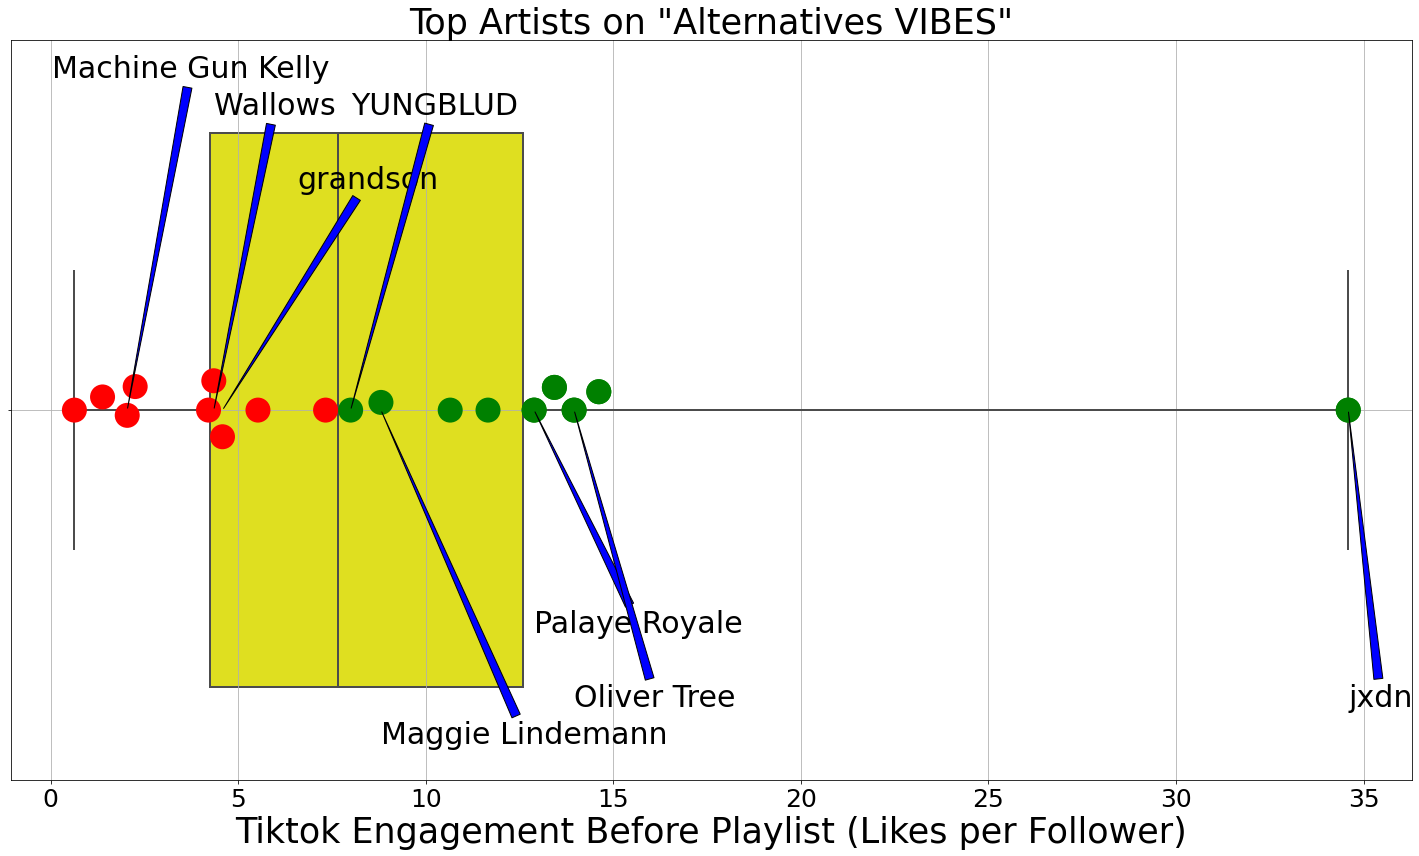

In [267]:
from matplotlib.pyplot import * 

fig = figure(figsize=(20,12))  # define the figure window
ax1  = fig.add_subplot(111)   # define the axis
sns.boxplot(TTI['tk_engagement_before(likes per follower)'], fliersize=1,linewidth=2, whis=30,width=.75, color='yellow')
#markers with just twitter
sns.swarmplot(data=top75en,x=top75en['tk_engagement_before(likes per follower)'], color='green', size=25)
sns.swarmplot(data=top50en,x=top50en['tk_engagement_before(likes per follower)'], color='green', size=25)
sns.swarmplot(data=bottom50en,x=bottom50en['tk_engagement_before(likes per follower)'], color='red', size=25)




plt.title('Top Artists on "Alternatives VIBES"', fontsize=35)
plt.xlabel('Tiktok Engagement Before Playlist (Likes per Follower)', fontsize=35)
plt.ticklabel_format(style='plain', axis='x') #change xaxis from sci to plain style

plt.annotate('grandson', xy=((TTI.loc[TTI['artist'] == 'grandson'])['tk_engagement_before(likes per follower)'],0), xytext=((TTI.loc[TTI['artist'] == 'grandson'])['tk_engagement_before(likes per follower)']+2,-0.3),
            arrowprops=dict(facecolor='blue', arrowstyle='wedge'), fontsize=30)
plt.annotate('Palaye Royale', xy=((TTI.loc[TTI['artist'] == 'Palaye Royale'])['tk_engagement_before(likes per follower)'],0), xytext=((TTI.loc[TTI['artist'] == 'Palaye Royale'])['tk_engagement_before(likes per follower)'],0.3),
            arrowprops=dict(facecolor='blue', arrowstyle='wedge'), fontsize=30)
plt.annotate('YUNGBLUD', xy=((TTI.loc[TTI['artist'] == 'YUNGBLUD'])['tk_engagement_before(likes per follower)'],0), xytext=((TTI.loc[TTI['artist'] == 'YUNGBLUD'])['tk_engagement_before(likes per follower)'],-0.4),
            arrowprops=dict(facecolor='blue', arrowstyle='wedge'), fontsize=30)
plt.annotate('Oliver Tree', xy=((TTI.loc[TTI['artist'] == 'Oliver Tree'])['tk_engagement_before(likes per follower)'],0), xytext=((TTI.loc[TTI['artist'] == 'Oliver Tree'])['tk_engagement_before(likes per follower)'],0.4),
            arrowprops=dict(facecolor='blue', arrowstyle='wedge'), fontsize=30)
plt.annotate('Wallows', xy=((TTI.loc[TTI['artist'] == 'Wallows'])['tk_engagement_before(likes per follower)'],0), xytext=((TTI.loc[TTI['artist'] == 'Wallows'])['tk_engagement_before(likes per follower)'],-0.4),
            arrowprops=dict(facecolor='blue', arrowstyle='wedge'), fontsize=30)
plt.annotate('jxdn', xy=((TTI.loc[TTI['artist'] == 'jxdn'])['tk_engagement_before(likes per follower)'],0), xytext=((TTI.loc[TTI['artist'] == 'jxdn'])['tk_engagement_before(likes per follower)'],0.4),
            arrowprops=dict(facecolor='blue', arrowstyle='wedge'), fontsize=30)
plt.annotate('Machine Gun Kelly', xy=((TTI.loc[TTI['artist'] == 'Machine Gun Kelly'])['tk_engagement_before(likes per follower)'],0), xytext=((TTI.loc[TTI['artist'] == 'Machine Gun Kelly'])['tk_engagement_before(likes per follower)']-2,-0.45),
            arrowprops=dict(facecolor='blue', arrowstyle='wedge'), fontsize=30)
plt.annotate('Maggie Lindemann', xy=((TTI.loc[TTI['artist'] == 'Maggie Lindemann'])['tk_engagement_before(likes per follower)'],0), xytext=((TTI.loc[TTI['artist'] == 'Maggie Lindemann'])['tk_engagement_before(likes per follower)'],0.45),
            arrowprops=dict(facecolor='blue', arrowstyle='wedge'), fontsize=30)



plt.tick_params(axis='x', which='major', labelsize=25)
plt.grid(axis='both')

plt.tight_layout()
plt.savefig('visuals/tkengagement_bp.png')

plt.show()

In [239]:
get_summary_statistics(TTI['tk_engagement_before(likes per follower)'])

Min: 0
Mean: 9
Max: 34
25th percentile: 4
Median: 7
75th percentile: 12
Interquartile range (IQR): 8


In [268]:
TTI.sort_values('Total Spotify Reach', ascending=False)

,isrc,added_at,removed_at,days_on_playlist,title,artist,spotify_pop,cm_track_id,cm_artist_id,track_genre,...,Instagram,Tiktok,Net Follower Gain/Loss(Spotify),Net Follower Gain/Loss(Twitter),Net Follower Gain/Loss(Instagram),Net Follower Gain/Loss(Tiktok),before_pl_tklikes,after_pl_tklikes,tk_engagement_before(likes per follower),Total Spotify Reach
index,,,,,,,,,,,,,,,,,,,,,
12,USAT22004348,2020-07-21,2020-11-20,122,So What!,jxdn,68.0,30210665,3573734,NaN,...,True,True,255735.0,442136.0,972427.0,1700000.0,245600000,292100000,34.591549,22552797
95,QM6MZ2094860,2020-08-31,2020-10-21,51,Hold Me Down,The Happy Fits,NaN,31079865,211191,"indie rockism,modern rock,new jersey indie",...,True,True,6221.0,291.0,1253.0,500.0,178300,186400,14.614754,0
85,USAT22000467,2020-07-20,2020-09-24,66,Bury Me Alive,Oliver Tree,NaN,29566342,430760,alternative hip hop,...,True,True,193390.0,26548.0,128954.0,597200.0,12600000,26100000,13.956580,1031053
90,USHR22010904,2020-08-31,2020-10-21,51,Carhartts & Converse (feat. Mark Hoppus),Super Whatevr,41.0,30064321,178152,"alternative emo,anthem emo,modern alternative ...",...,True,True,1527.0,-254.0,632.0,-81900.0,1100000,1200000,13.431013,1716
37,USYFZ2031305,2020-08-31,2020-11-08,69,Lonely,Palaye Royale,NaN,28736863,49674,"modern alternative rock,modern rock,pop punk,v...",...,True,True,33008.0,4514.0,10162.0,3600.0,507900,570800,12.890863,889377
98,USUM72011694,2020-07-21,2020-10-21,92,The Machine,Oliver Malcolm,NaN,30202851,3566277,NaN,...,True,True,3400.0,45.0,1296.0,12.0,793,834,11.661765,10017077
65,QZJ2A1900023,2020-08-31,2020-11-08,69,Self Control,phem,32.0,31154972,716979,NaN,...,True,True,8215.0,1480.0,13394.0,1200.0,110800,127900,10.653846,1764509
66,QZMLX2000004,2020-08-31,2020-11-08,69,Knife Under My Pillow,Maggie Lindemann,56.0,31150967,62961,"dance pop,pop,post-teen pop,social media pop,v...",...,True,True,64921.0,-2098.0,97277.0,113800.0,6600000,8900000,8.808221,8665944
59,USUG12002400,2020-08-31,2020-11-08,69,Strawberry Lipstick,YUNGBLUD,NaN,30209602,558951,british indie rock,...,True,True,150409.0,37516.0,307271.0,400000.0,10400000,15500000,8.000000,8313164


4 out of 5 of the artists in the top 25% of followers gained are also in the top 25% of Tiktok Engagements. At least 2.5 million likes per follower *before* they were added to the playlist
- jxdn 
- Oliver Tree
- YUNGBLUD
- Maggie Lindermann
- Wallows

<AxesSubplot:xlabel='tk_engagement_before(likes per follower)', ylabel='Net Follower Gain/Loss(Spotify)'>

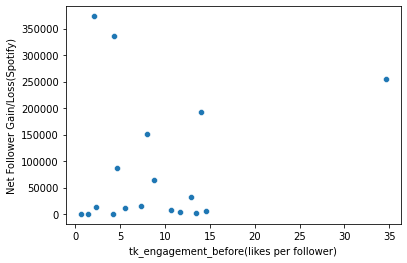

In [106]:
sns.scatterplot(data=TTI, x='tk_engagement_before(likes per follower)', y='Net Follower Gain/Loss(Spotify)')

In [93]:
TTI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 6 to 98
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   isrc                                      18 non-null     object 
 1   added_at                                  18 non-null     object 
 2   removed_at                                18 non-null     object 
 3   days_on_playlist                          18 non-null     int64  
 4   title                                     18 non-null     object 
 5   artist                                    18 non-null     object 
 6   spotify_pop                               9 non-null      float64
 7   cm_track_id                               18 non-null     int64  
 8   cm_artist_id                              18 non-null     int64  
 9   track_genre                               13 non-null     object 
 10  release_date                            

## Playlist Reach
During the time that each artist was on Alternative VIBES, what was the total reach for all playlists

In [ ]:
get_playlist_reach(api_token, since_date,until_date, track_id, platform, status='current')

In [108]:
bucket = []
for row in TTI.iterrows():
    track_id = row[1]['cm_track_id']
    since_date = row[1]['added_at']
    until_date = row[1]['removed_at']
    artist_id = row[1]['cm_artist_id']
    reach = get_playlist_reach(api_token, since_date,until_date, track_id, 'spotify', status='past')
    bucket.append(reach)

        
TTI['Total Spotify Reach'] = bucket


<ipython-input-108-b69837183301>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TTI['Total Spotify Reach'] = bucket


In [241]:
top75reach = TTI.loc[TTI['Total Spotify Reach'] >= TTI['Total Spotify Reach'].quantile(.75)]
top50reach = TTI.loc[TTI['Total Spotify Reach'] > TTI['Total Spotify Reach'].quantile(.5)]
bottom50reach = TTI.loc[TTI['Total Spotify Reach'] < TTI['Total Spotify Reach'].quantile(.50)]
popsongs = TTI2.loc[TTI2['Pop'] == True]

In [216]:
(TTI.loc[TTI['artist'] == 'grandson'])['Total Spotify Reach']

index
27    6874023
Name: Total Spotify Reach, dtype: int64

/home/bull/Documents/practice1/test/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


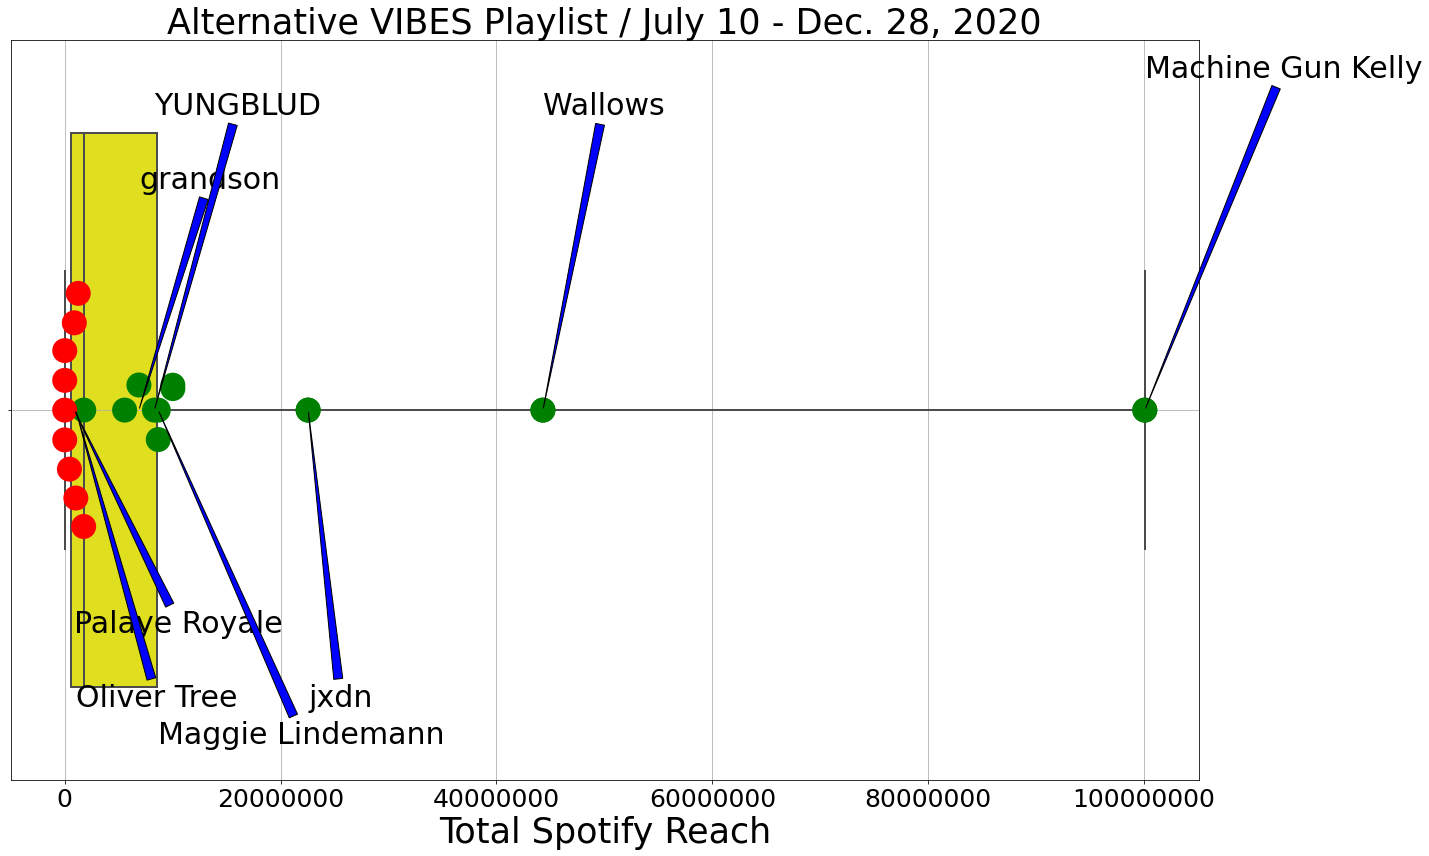

In [247]:
from matplotlib.pyplot import * 

fig = figure(figsize=(20,12))  # define the figure window
ax1  = fig.add_subplot(111)   # define the axis
sns.boxplot(TTI['Total Spotify Reach'], fliersize=1,linewidth=2, whis=30,width=.75, color='yellow')
#markers with just twitter
sns.swarmplot(data=top75reach,x=top75reach['Total Spotify Reach'], color='green', size=25)
sns.swarmplot(data=top50reach,x=top50reach['Total Spotify Reach'], color='green', size=25)
sns.swarmplot(data=bottom50reach,x=bottom50reach['Total Spotify Reach'], color='red', size=25)
# sns.swarmplot(data=popsongs,x=popsongs['Total Spotify Reach'], color='orange', size=25)





plt.title('Alternative VIBES Playlist / July 10 - Dec. 28, 2020', fontsize=35)
plt.xlabel('Total Spotify Reach', fontsize=35)
plt.ticklabel_format(style='plain', axis='x') #change xaxis from sci to plain style

plt.annotate('grandson', xy=((TTI.loc[TTI['artist'] == 'grandson'])['Total Spotify Reach'],0), xytext=((TTI.loc[TTI['artist'] == 'grandson'])['Total Spotify Reach']+2,-0.3),
            arrowprops=dict(facecolor='blue', arrowstyle='wedge'), fontsize=30)
plt.annotate('Palaye Royale', xy=((TTI.loc[TTI['artist'] == 'Palaye Royale'])['Total Spotify Reach'],0), xytext=((TTI.loc[TTI['artist'] == 'Palaye Royale'])['Total Spotify Reach'],0.3),
            arrowprops=dict(facecolor='blue', arrowstyle='wedge'), fontsize=30)
plt.annotate('YUNGBLUD', xy=((TTI.loc[TTI['artist'] == 'YUNGBLUD'])['Total Spotify Reach'],0), xytext=((TTI.loc[TTI['artist'] == 'YUNGBLUD'])['Total Spotify Reach'],-0.4),
            arrowprops=dict(facecolor='blue', arrowstyle='wedge'), fontsize=30)
plt.annotate('Oliver Tree', xy=((TTI.loc[TTI['artist'] == 'Oliver Tree'])['Total Spotify Reach'],0), xytext=((TTI.loc[TTI['artist'] == 'Oliver Tree'])['Total Spotify Reach'],0.4),
            arrowprops=dict(facecolor='blue', arrowstyle='wedge'), fontsize=30)
plt.annotate('Wallows', xy=((TTI.loc[TTI['artist'] == 'Wallows'])['Total Spotify Reach'],0), xytext=((TTI.loc[TTI['artist'] == 'Wallows'])['Total Spotify Reach'],-0.4),
            arrowprops=dict(facecolor='blue', arrowstyle='wedge'), fontsize=30)
plt.annotate('jxdn', xy=((TTI.loc[TTI['artist'] == 'jxdn'])['Total Spotify Reach'],0), xytext=((TTI.loc[TTI['artist'] == 'jxdn'])['Total Spotify Reach'],0.4),
            arrowprops=dict(facecolor='blue', arrowstyle='wedge'), fontsize=30)
plt.annotate('Machine Gun Kelly', xy=((TTI.loc[TTI['artist'] == 'Machine Gun Kelly'])['Total Spotify Reach'],0), xytext=((TTI.loc[TTI['artist'] == 'Machine Gun Kelly'])['Total Spotify Reach']-2,-0.45),
            arrowprops=dict(facecolor='blue', arrowstyle='wedge'), fontsize=30)
plt.annotate('Maggie Lindemann', xy=((TTI.loc[TTI['artist'] == 'Maggie Lindemann'])['Total Spotify Reach'],0), xytext=((TTI.loc[TTI['artist'] == 'Maggie Lindemann'])['Total Spotify Reach'],0.45),
            arrowprops=dict(facecolor='blue', arrowstyle='wedge'), fontsize=30)

# num=0
# ya=.1
# yb=-.1
# for track in TTI.iterrows():
#     if track[1]['Total Spotify Reach'] >= TTI['Total Spotify Reach'].quantile(.75):
#         if (num % 2) == 0:
#             plt.annotate(track[1]['artist'], xy=(track[1]['Total Spotify Reach'], 0),xytext=(track[1]['Total Spotify Reach'], ya),
#                      arrowprops=dict(facecolor='blue', arrowstyle='wedge'), fontsize=30)
#             plt.annotate(insert_thousands_commas(track[1]['Total Spotify Reach']), xy=(track[1]['Total Spotify Reach'], 0),xytext=(track[1]['Total Spotify Reach'], ya+.05)
#                      , fontsize=30)
            
#             num+=1
#             ya+=.1
#         else:
#             plt.annotate(track[1]['artist'], xy=(track[1]['Total Spotify Reach'], 0),xytext=(track[1]['Total Spotify Reach'], yb),
#                      arrowprops=dict(facecolor='blue', arrowstyle='wedge'), fontsize=30)
#             plt.annotate(insert_thousands_commas(track[1]['Total Spotify Reach']), xy=(track[1]['Total Spotify Reach'], 0),xytext=(track[1]['Total Spotify Reach'], yb-.05)
#                      , fontsize=30)

            
#             num+=1
#             yb+=-.1
# #     elif track[1]['tk_engagement_before(likes per follower)'] >= TTI['tk_engagement_before(likes per follower)'].quantile(.5):
# #         if (num % 2) == 0:
# #             plt.annotate(track[1]['artist'], xy=(track[1]['tk_engagement_before(likes per follower)'], 0),xytext=(track[1]['tk_engagement_before(likes per follower)'], ya),
# #                      arrowprops=dict(facecolor='blue', arrowstyle='wedge'), fontsize=30)
# #             plt.annotate(insert_thousands_commas(track[1]['tk_engagement_before(likes per follower)']), xy=(track[1]['tk_engagement_before(likes per follower)'], 0),xytext=(track[1]['Net Follower Gain/Loss(Spotify)'], ya+.05)
# #                      , fontsize=30)
            
# #             num+=1
# #             ya+=.1
# #         else:
# #             plt.annotate(track[1]['artist'], xy=(track[1]['tk_engagement_before(likes per follower)'], 0),xytext=(track[1]['tk_engagement_before(likes per follower)'], yb),
# #                      arrowprops=dict(facecolor='blue', arrowstyle='wedge'), fontsize=30)
# #             plt.annotate(insert_thousands_commas(track[1]['tk_engagement_before(likes per follower)']), xy=(track[1]['tk_engagement_before(likes per follower)'], 0),xytext=(track[1]['tk_engagement_before(likes per follower)'], yb-.05)
# #                      , fontsize=30)
# #             num+=1
# #             yb+=-.1


plt.tick_params(axis='x', which='major', labelsize=25)
plt.grid(axis='both')

plt.tight_layout()
plt.savefig('visuals/spotifyreach_bp.png')

plt.show()

In [248]:
get_summary_statistics(TTI['Total Spotify Reach'])

Min: 0
Mean: 11,859,767
Max: 100,064,820
25th percentile: 550,335
Median: 1,758,812
75th percentile: 8,577,749
Interquartile range (IQR): 8,027,414


3 out of 5 artists with the most gain in fans also had the largest playlist reach on Spotify. The larger your reach is then the more likely you are to gain more fans

In [269]:
TTI.sort_values('Total Spotify Reach', ascending=False)

,isrc,added_at,removed_at,days_on_playlist,title,artist,spotify_pop,cm_track_id,cm_artist_id,track_genre,...,Instagram,Tiktok,Net Follower Gain/Loss(Spotify),Net Follower Gain/Loss(Twitter),Net Follower Gain/Loss(Instagram),Net Follower Gain/Loss(Tiktok),before_pl_tklikes,after_pl_tklikes,tk_engagement_before(likes per follower),Total Spotify Reach
index,,,,,,,,,,,,,,,,,,,,,
10,USUM72014730,2020-08-31,2020-11-20,81,my ex's best friend (with blackbear),Machine Gun Kelly,85.0,30778891,3991,"pop rap,rap,pop",...,True,True,373108.0,92438.0,679361.0,813200.0,1200000,8600000,2.044990,100064820
94,USAT21812258,2020-07-20,2020-09-24,66,Are You Bored Yet? (feat. Clairo),Wallows,83.0,22358948,568354,"indie pop,modern rock,pop,bedroom pop,boston i...",...,True,True,335622.0,74740.0,321128.0,504000.0,3900000,10600000,4.352679,44304208
12,USAT22004348,2020-07-21,2020-11-20,122,So What!,jxdn,68.0,30210665,3573734,NaN,...,True,True,255735.0,442136.0,972427.0,1700000.0,245600000,292100000,34.591549,22552797
98,USUM72011694,2020-07-21,2020-10-21,92,The Machine,Oliver Malcolm,NaN,30202851,3566277,NaN,...,True,True,3400.0,45.0,1296.0,12.0,793,834,11.661765,10017077
66,QZMLX2000004,2020-08-31,2020-11-08,69,Knife Under My Pillow,Maggie Lindemann,56.0,31150967,62961,"dance pop,pop,post-teen pop,social media pop,v...",...,True,True,64921.0,-2098.0,97277.0,113800.0,6600000,8900000,8.808221,8665944
59,USUG12002400,2020-08-31,2020-11-08,69,Strawberry Lipstick,YUNGBLUD,NaN,30209602,558951,british indie rock,...,True,True,150409.0,37516.0,307271.0,400000.0,10400000,15500000,8.000000,8313164
27,USAT22003150,2020-08-31,2020-11-18,79,Riptide,grandson,58.0,30517008,215304,"modern alternative rock,modern rock",...,True,True,87989.0,3421.0,24944.0,379600.0,157700,3200000,4.584302,6874023
11,GBKPL2000362,2020-07-20,2020-09-24,66,Obvious Guy,Alfie Templeman,NaN,29979435,812218,NaN,...,True,True,11485.0,1652.0,2819.0,200.0,55300,55600,5.530000,5550427
65,QZJ2A1900023,2020-08-31,2020-11-08,69,Self Control,phem,32.0,31154972,716979,NaN,...,True,True,8215.0,1480.0,13394.0,1200.0,110800,127900,10.653846,1764509


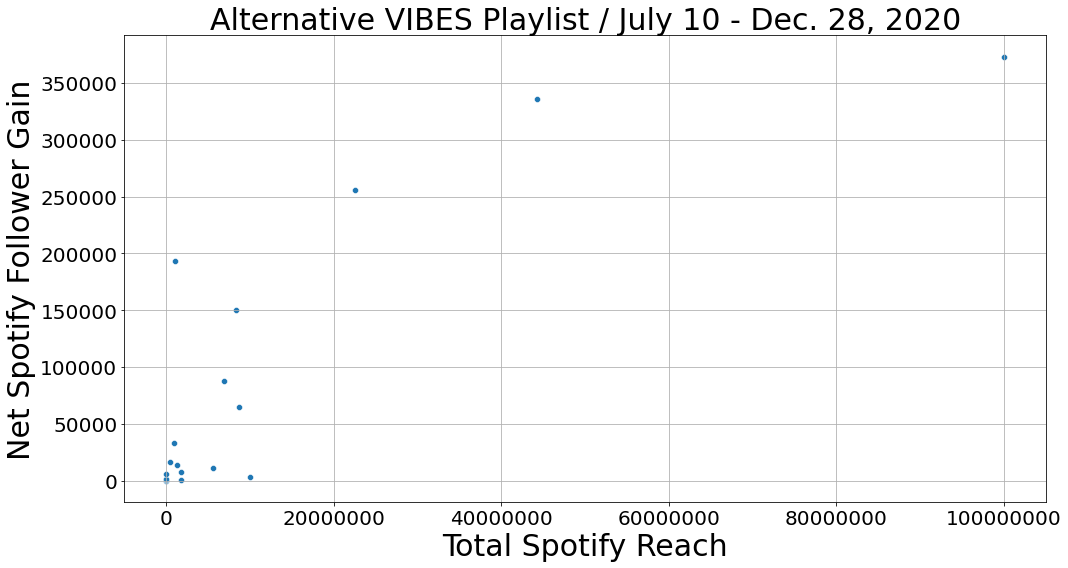

In [265]:
fig = figure(figsize=(15,8))  # define the figure window
ax1  = fig.add_subplot(111)   # define the axis
sns.scatterplot(data=TTI, x='Total Spotify Reach', y='Net Follower Gain/Loss(Spotify)')
plt.title('Alternative VIBES Playlist / July 10 - Dec. 28, 2020', fontsize=30)
plt.xlabel('Total Spotify Reach', fontsize=30)
plt.ylabel('Net Spotify Follower Gain', fontsize=30)

plt.ticklabel_format(style='plain', axis='x') #change xaxis from sci to plain style
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(axis='both')

plt.tight_layout()
plt.savefig('visuals/gain_reach_scatter.png')

plt.show()

## Genre Reach
Do songs that are considered `pop` have a larger reach?

In [187]:
TTI2 = TTI.dropna(subset=['track_genre'])

In [178]:
import re
def genre_pop(pattern, string):
    if string:
        if re.search(pattern,string):
            return True
        else:
            return False
    else:
        return False


In [188]:
TTI2['Pop'] = TTI2['track_genre'].apply(lambda x: True if genre_pop('pop', x) else (False))
        

<ipython-input-188-b73c02c43399>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TTI2['Pop'] = TTI2['track_genre'].apply(lambda x: True if genre_pop('pop', x) else (False))


<AxesSubplot:xlabel='Total Spotify Reach', ylabel='Net Follower Gain/Loss(Spotify)'>

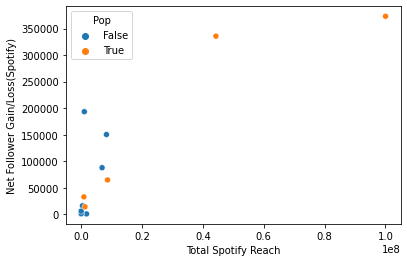

In [191]:
sns.scatterplot(data=TTI2, x='Total Spotify Reach', y='Net Follower Gain/Loss(Spotify)', hue='Pop')

In [157]:
genre_pop("pop", string)

False

In [143]:
genre_pop('pop', string)

True

In [115]:
TTI.sort_values('Net Follower Gain/Loss(Spotify)', ascending=False)

,isrc,added_at,removed_at,days_on_playlist,title,artist,spotify_pop,cm_track_id,cm_artist_id,track_genre,...,Instagram,Tiktok,Net Follower Gain/Loss(Spotify),Net Follower Gain/Loss(Twitter),Net Follower Gain/Loss(Instagram),Net Follower Gain/Loss(Tiktok),before_pl_tklikes,after_pl_tklikes,tk_engagement_before(likes per follower),Total Spotify Reach
index,,,,,,,,,,,,,,,,,,,,,
10,USUM72014730,2020-08-31,2020-11-20,81,my ex's best friend (with blackbear),Machine Gun Kelly,85.0,30778891,3991,"pop rap,rap,pop",...,True,True,373108.0,92438.0,679361.0,813200.0,1200000,8600000,2.044990,100064820
94,USAT21812258,2020-07-20,2020-09-24,66,Are You Bored Yet? (feat. Clairo),Wallows,83.0,22358948,568354,"indie pop,modern rock,pop,bedroom pop,boston i...",...,True,True,335622.0,74740.0,321128.0,504000.0,3900000,10600000,4.352679,44304208
12,USAT22004348,2020-07-21,2020-11-20,122,So What!,jxdn,68.0,30210665,3573734,NaN,...,True,True,255735.0,442136.0,972427.0,1700000.0,245600000,292100000,34.591549,22552797
85,USAT22000467,2020-07-20,2020-09-24,66,Bury Me Alive,Oliver Tree,NaN,29566342,430760,alternative hip hop,...,True,True,193390.0,26548.0,128954.0,597200.0,12600000,26100000,13.956580,1031053
59,USUG12002400,2020-08-31,2020-11-08,69,Strawberry Lipstick,YUNGBLUD,NaN,30209602,558951,british indie rock,...,True,True,150409.0,37516.0,307271.0,400000.0,10400000,15500000,8.000000,8313164
27,USAT22003150,2020-08-31,2020-11-18,79,Riptide,grandson,58.0,30517008,215304,"modern alternative rock,modern rock",...,True,True,87989.0,3421.0,24944.0,379600.0,157700,3200000,4.584302,6874023
66,QZMLX2000004,2020-08-31,2020-11-08,69,Knife Under My Pillow,Maggie Lindemann,56.0,31150967,62961,"dance pop,pop,post-teen pop,social media pop,v...",...,True,True,64921.0,-2098.0,97277.0,113800.0,6600000,8900000,8.808221,8665944
37,USYFZ2031305,2020-08-31,2020-11-08,69,Lonely,Palaye Royale,NaN,28736863,49674,"modern alternative rock,modern rock,pop punk,v...",...,True,True,33008.0,4514.0,10162.0,3600.0,507900,570800,12.890863,889377
6,USRC12000604,2020-08-31,2020-11-20,81,Someone Else,Rezz,63.0,28979827,206307,"brostep,canadian electronic,edm,electra,electr...",...,True,True,16260.0,3851.0,6298.0,1000.0,253700,259700,7.332370,437322


In [212]:
TTI.sort_values('tk_engagement_before(likes per follower)', ascending=False)

,isrc,added_at,removed_at,days_on_playlist,title,artist,spotify_pop,cm_track_id,cm_artist_id,track_genre,...,Instagram,Tiktok,Net Follower Gain/Loss(Spotify),Net Follower Gain/Loss(Twitter),Net Follower Gain/Loss(Instagram),Net Follower Gain/Loss(Tiktok),before_pl_tklikes,after_pl_tklikes,tk_engagement_before(likes per follower),Total Spotify Reach
index,,,,,,,,,,,,,,,,,,,,,
12,USAT22004348,2020-07-21,2020-11-20,122,So What!,jxdn,68.0,30210665,3573734,NaN,...,True,True,255735.0,442136.0,972427.0,1700000.0,245600000,292100000,34.591549,22552797
95,QM6MZ2094860,2020-08-31,2020-10-21,51,Hold Me Down,The Happy Fits,NaN,31079865,211191,"indie rockism,modern rock,new jersey indie",...,True,True,6221.0,291.0,1253.0,500.0,178300,186400,14.614754,0
85,USAT22000467,2020-07-20,2020-09-24,66,Bury Me Alive,Oliver Tree,NaN,29566342,430760,alternative hip hop,...,True,True,193390.0,26548.0,128954.0,597200.0,12600000,26100000,13.956580,1031053
90,USHR22010904,2020-08-31,2020-10-21,51,Carhartts & Converse (feat. Mark Hoppus),Super Whatevr,41.0,30064321,178152,"alternative emo,anthem emo,modern alternative ...",...,True,True,1527.0,-254.0,632.0,-81900.0,1100000,1200000,13.431013,1716
37,USYFZ2031305,2020-08-31,2020-11-08,69,Lonely,Palaye Royale,NaN,28736863,49674,"modern alternative rock,modern rock,pop punk,v...",...,True,True,33008.0,4514.0,10162.0,3600.0,507900,570800,12.890863,889377
98,USUM72011694,2020-07-21,2020-10-21,92,The Machine,Oliver Malcolm,NaN,30202851,3566277,NaN,...,True,True,3400.0,45.0,1296.0,12.0,793,834,11.661765,10017077
65,QZJ2A1900023,2020-08-31,2020-11-08,69,Self Control,phem,32.0,31154972,716979,NaN,...,True,True,8215.0,1480.0,13394.0,1200.0,110800,127900,10.653846,1764509
66,QZMLX2000004,2020-08-31,2020-11-08,69,Knife Under My Pillow,Maggie Lindemann,56.0,31150967,62961,"dance pop,pop,post-teen pop,social media pop,v...",...,True,True,64921.0,-2098.0,97277.0,113800.0,6600000,8900000,8.808221,8665944
59,USUG12002400,2020-08-31,2020-11-08,69,Strawberry Lipstick,YUNGBLUD,NaN,30209602,558951,british indie rock,...,True,True,150409.0,37516.0,307271.0,400000.0,10400000,15500000,8.000000,8313164
